In [ ]:
#importing zip file and extracting it

import zipfile
import os

# Path to archive file (update filename as needed)
archive_path = '/content/archive.zip' #path to the zip file
extract_dir = '/content/mnist dataset' #path to the extracted folder

# Create extract destination folder if it doesn't exist
os.makedirs(extract_dir, exist_ok=True) #create the extract destination folder if it doesn't exist

# Extract all contents
with zipfile.ZipFile(archive_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Dataset extracted to:", extract_dir)


Dataset extracted to: /content/mnist dataset


In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the train and test data sets
train_data = pd.read_csv("/content/mnist dataset/mnist_train.csv")
test_data = pd.read_csv("/content/mnist dataset/mnist_test.csv")


In [ ]:
train_data.shape #cheak the shape of the train data

(60000, 785)

In [6]:
train_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print("Dataset shape:", train_data.shape)
train_data.info()


Dataset shape: (60000, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [8]:
train_data.isnull().sum().sum()

np.int64(0)

In [9]:
train_data.duplicated().sum()

np.int64(0)

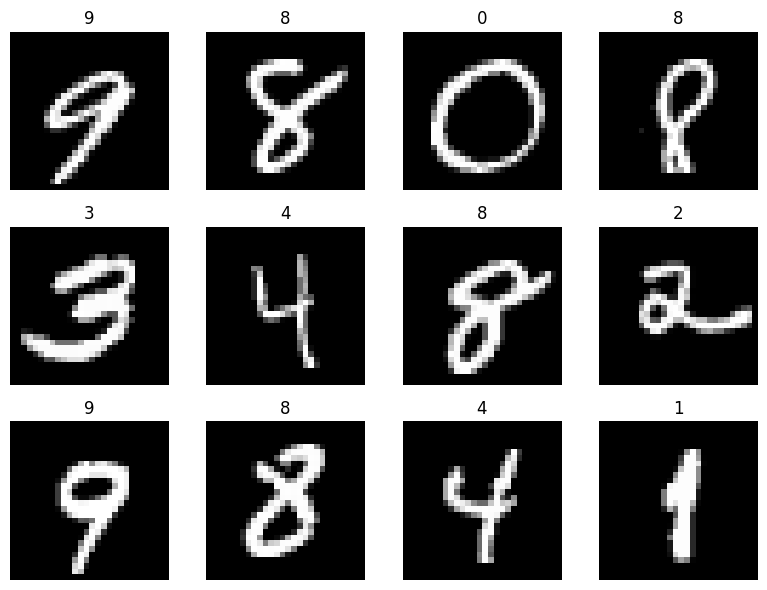

In [ ]:

# plotinng Randomly select 12 unique indices from the training dataset

num_images = 12
rows, cols = 3, 4
indices = np.random.choice(len(train_data), num_images, replace=False)

plt.figure(figsize=(8, 6))

for i, idx in enumerate(indices):
    label = train_data.iloc[idx, 0]
    pixels = train_data.iloc[idx, 1:].values.reshape(28, 28)

    plt.subplot(rows, cols, i + 1)
    plt.imshow(pixels, cmap="gray")
    plt.title(f"{label}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
class_counts = train_data['label'].value_counts().sort_index()
print(class_counts) #print the class counts


label
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64


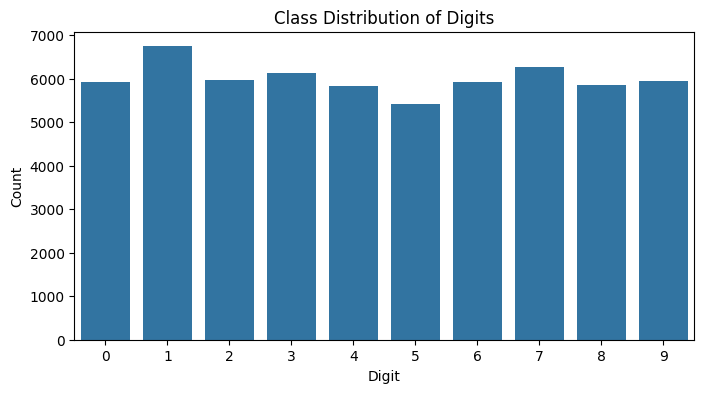

In [ ]:
#plotting the class distribution of the digits
plt.figure(figsize=(8,4)) 
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Class Distribution of Digits")
plt.show()


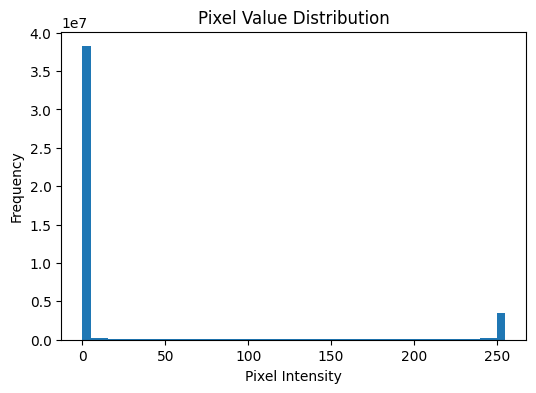

In [ ]:
#plotting the pixel value distribution
pixels = train_data.iloc[:, 1:].values.flatten()

plt.figure(figsize=(6,4))
plt.hist(pixels, bins=50)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Pixel Value Distribution")
plt.show()


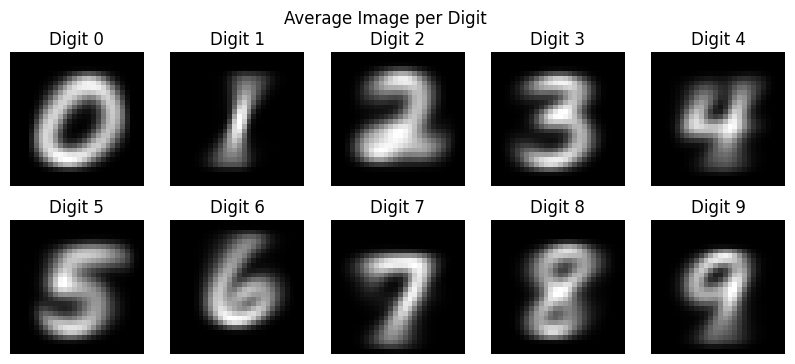

In [ ]:
#plotting the mean image of each digit
plt.figure(figsize=(10,4))

for digit in range(10):
    mean_image = train_data[train_data['label']==digit].iloc[:,1:].mean().values
    mean_image = mean_image.reshape(28,28)

    plt.subplot(2,5,digit+1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(f"Digit {digit}")
    plt.axis('off')

plt.suptitle("Average Image per Digit")
plt.show()


In [ ]:
#preprocessing the data and splitting features and labels of train and test data
X_train = train_data.iloc[:, 1:] / 255.0
y_train = train_data['label']

X_test = test_data.iloc[:, 1:] / 255.0
y_test = test_data['label']


In [ ]:
X_test.shape #cheak the shape of the test data

(10000, 784)

In [ ]:
X_train.shape#cheak the shape of the train data

(60000, 784)

In [ ]:
from sklearn.decomposition import PCA #importing the PCA from sklearn to reduce the dimensionality of the data

In [ ]:
pca = PCA(n_components=0.95, random_state=42) #initializing the PCA with 95% of the variance
X_train_pca = pca.fit_transform(X_train) #fitting the PCA on the train data
X_test_pca = pca.transform(X_test) #transforming the test data

print("Auto-selected components:", pca.n_components_)

Auto-selected components: 154


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #importing the KNN classifier from sklearn
from sklearn.metrics import accuracy_score, confusion_matrix #importing the accuracy score and confusion matrix from sklearn to evaluate the performance of the model

In [ ]:
k_values = range(1, 21, 2) #defining the range of k values to be used in the KNN classifier and the accuracy scores list

In [ ]:
# defining the accuracy scores list
accuracy_scores = []
#looping through the k values to train the KNN classifier and evaluate the accuracy
for k in k_values:
    knn = KNeighborsClassifier(
        n_neighbors=k,
        weights='uniform',
        n_jobs=-1
    )
#fitting the KNN classifier on the train data
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
#calculating the accuracy score
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
#printing the accuracy score
    print(f"K={k}, Accuracy={acc:.4f}")
#finding the best k value

K=1, Accuracy=0.9694
K=3, Accuracy=0.9722
K=5, Accuracy=0.9712
K=7, Accuracy=0.9710
K=9, Accuracy=0.9696
K=11, Accuracy=0.9682
K=13, Accuracy=0.9673
K=15, Accuracy=0.9664
K=17, Accuracy=0.9645
K=19, Accuracy=0.9641


In [ ]:
best_k = k_values[np.argmax(accuracy_scores)]
knn_acc = max(accuracy_scores)
#printing the best k value and the best accuracy score
print("\nBest K:", best_k)
print("Best Accuracy:", knn_acc)
#fitting the KNN classifier on the train data


Best K: 3
Best Accuracy: 0.9722


In [ ]:
final_knn = KNeighborsClassifier(
    n_neighbors=best_k,
    weights='distance',
    n_jobs=-1
)
#fitting the KNN classifier on the train data       
final_knn.fit(X_train_pca, y_train)
#predicting the test data
final_predictions = final_knn.predict(X_test_pca)
#plotting the accuracy vs k value

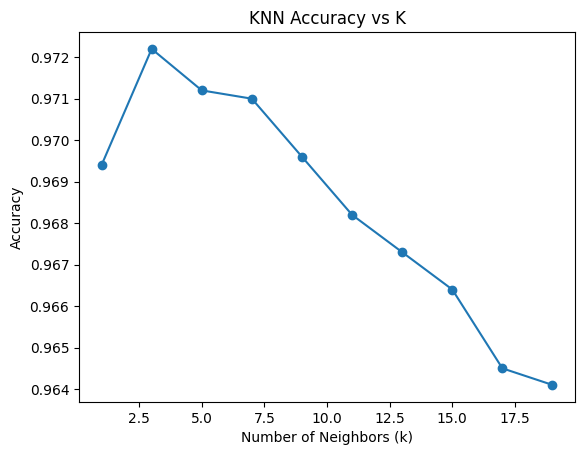

In [ ]:
import matplotlib.pyplot as plt
#plotting the accuracy vs k value 

plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K")
plt.show()


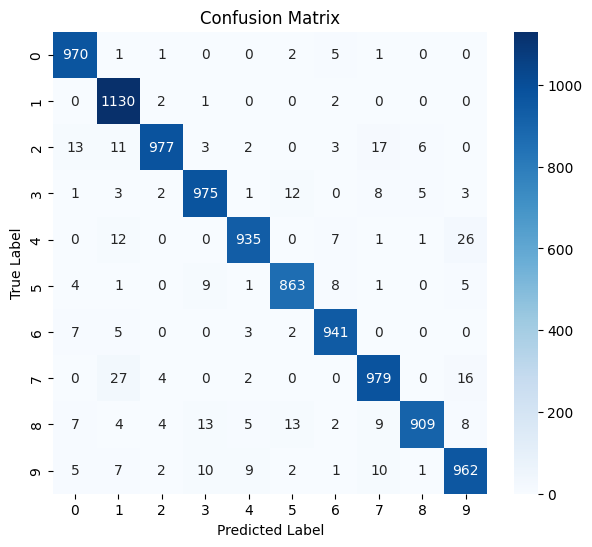

In [ ]:
#plotting the confusion matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) #print the classification report

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.94      1.00      0.97      1135
           2       0.98      0.95      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.95      0.96       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.95      0.95      0.95      1028
           8       0.99      0.93      0.96       974
           9       0.94      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [ ]:
per_class_acc = cm.diagonal() / cm.sum(axis=1)
#printing the per class accuracy
for i, acc in enumerate(per_class_acc):
    print(f"Digit {i} accuracy: {acc:.4f}")


Digit 0 accuracy: 0.9898
Digit 1 accuracy: 0.9956
Digit 2 accuracy: 0.9467
Digit 3 accuracy: 0.9653
Digit 4 accuracy: 0.9521
Digit 5 accuracy: 0.9675
Digit 6 accuracy: 0.9823
Digit 7 accuracy: 0.9523
Digit 8 accuracy: 0.9333
Digit 9 accuracy: 0.9534


In [ ]:
error_rate = 1 - accuracy_score(y_test, y_pred)
print("Error Rate:", error_rate) #print the error rate


Error Rate: 0.03590000000000004


In [ ]:
from sklearn.model_selection import GridSearchCV #importing the GridSearchCV from sklearn to find the best parameters for the SVM classifier
from sklearn.svm import SVC #importing the SVC from sklearn to create the SVM classifier
svm = SVC() #creating the SVM classifier
#defining the parameter grid for the SVM classifier
param_grid = {
    'C': [1, 10],
    'gamma': [0.01, 0.05],
    'kernel': ['rbf']
}


In [ ]:
#performing the grid search to find the best parameters for the SVM classifier
grid= GridSearchCV(
    svm,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train_pca, y_train)
#printing the best parameters and the best accuracy score

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': [0.01, 0.05],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [ ]:
print("Best C:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)
#fitting the best SVM classifier on the train data

Best C: {'C': 10, 'gamma': 0.05, 'kernel': 'rbf'}
Best CV Accuracy: 0.9824333333333334


In [ ]:
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test_pca)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
#calculating the accuracy score
svm_acc= accuracy_score(y_test, y_pred)
print("Accuracy:", svm_acc)
print(classification_report(y_test, y_pred)) #print the classification report


Accuracy: 0.9852
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



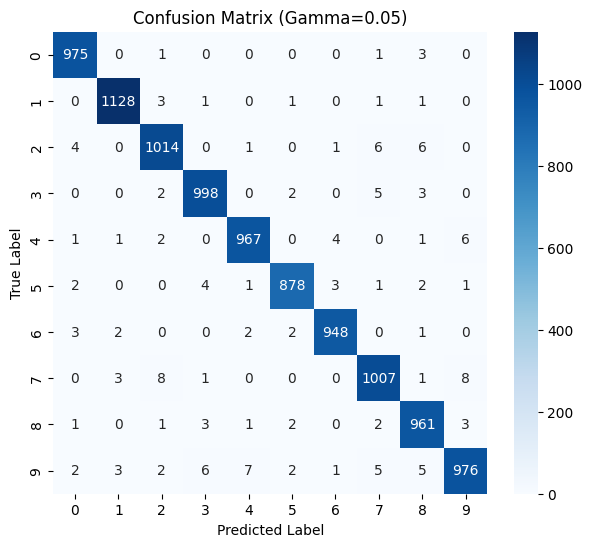

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred) #plotting the confusion matrix

best_gamma = grid.best_params_['gamma']

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix (Gamma={best_gamma})")
plt.show()

In [ ]:
per_class_acc = cm.diagonal() / cm.sum(axis=1)

for i, acc in enumerate(per_class_acc):
    print(f"Digit {i} accuracy: {acc:.3f}")
#printing the accuracy of each digit

Digit 0 accuracy: 0.995
Digit 1 accuracy: 0.994
Digit 2 accuracy: 0.983
Digit 3 accuracy: 0.988
Digit 4 accuracy: 0.985
Digit 5 accuracy: 0.984
Digit 6 accuracy: 0.990
Digit 7 accuracy: 0.980
Digit 8 accuracy: 0.987
Digit 9 accuracy: 0.967


In [ ]:
misclassified_idx = np.where(y_test != y_pred)[0]
print("Total misclassified samples:", len(misclassified_idx))
#printing the total number of misclassified samples

Total misclassified samples: 148


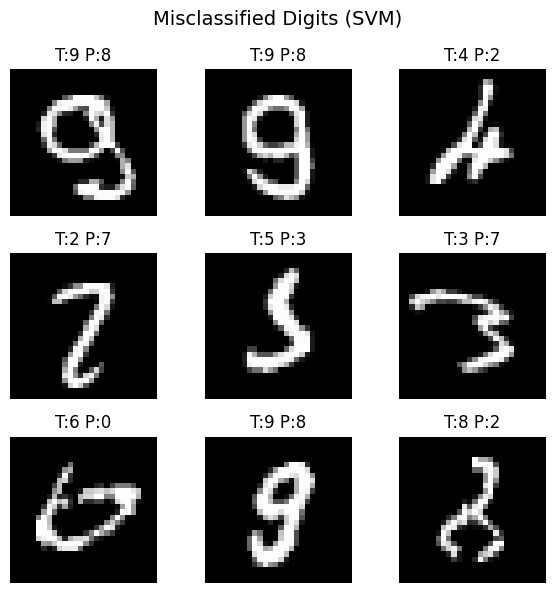

In [38]:
import matplotlib.pyplot as plt

num_images = 9  # show first 9 misclassified samples

plt.figure(figsize=(6,6))

for i, idx in enumerate(misclassified_idx[:num_images]):
    image = X_test.iloc[idx].values.reshape(28, 28)
    true_label = y_test.iloc[idx]
    pred_label = y_pred[idx]

    plt.subplot(3,3,i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"T:{true_label} P:{pred_label}")
    plt.axis('off')

plt.suptitle("Misclassified Digits (SVM)", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier #importing the DecisionTreeClassifier from sklearn to create the Decision Tree classifier
from sklearn.model_selection import GridSearchCV #importing the GridSearchCV from sklearn to find the best parameters for the Decision Tree classifier
from sklearn.metrics import accuracy_score, classification_report #importing the accuracy score and classification report from sklearn to evaluate the performance of the model


In [ ]:
param_grid = {
    'max_depth': [10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
} #defining the parameter grid for the Decision Tree classifier


In [ ]:
dt = DecisionTreeClassifier(random_state=42) #creating the Decision Tree classifier

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

In [ ]:
grid_dt.fit(X_train, y_train)#fitting the Decision Tree classifier on the train data

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [43]:
print("Best parameters:", grid_dt.best_params_)
print("Best CV accuracy:", grid_dt.best_score_)


Best parameters: {'max_depth': 25, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best CV accuracy: 0.8640833333333333


In [ ]:
best_dt = grid_dt.best_estimator_
#predicting the test data
y_pred = best_dt.predict(X_test)
#calculating the accuracy score
dt_acc= accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.94      0.92       980
           1       0.96      0.97      0.96      1135
           2       0.85      0.86      0.86      1032
           3       0.84      0.86      0.85      1010
           4       0.88      0.88      0.88       982
           5       0.84      0.84      0.84       892
           6       0.87      0.88      0.88       958
           7       0.93      0.91      0.92      1028
           8       0.83      0.79      0.81       974
           9       0.88      0.85      0.86      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



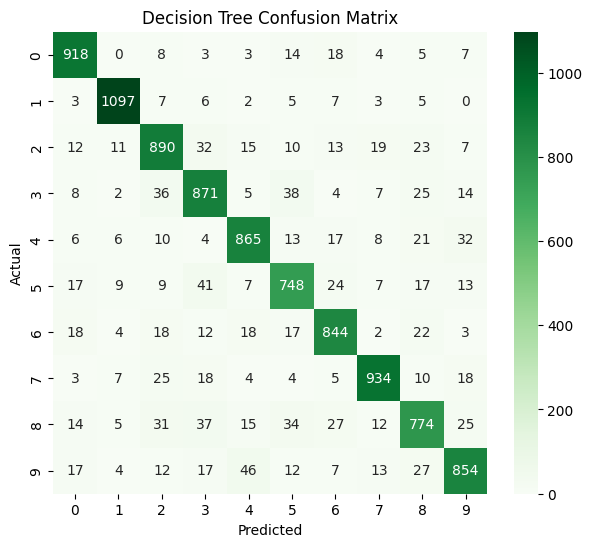

In [ ]:
from sklearn.metrics import confusion_matrix #plotting the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Confusion Matrix")
plt.show()


In [46]:
mis_idx = np.where(y_test != y_pred)[0]
print("Total misclassified samples:", len(mis_idx))


Total misclassified samples: 1205


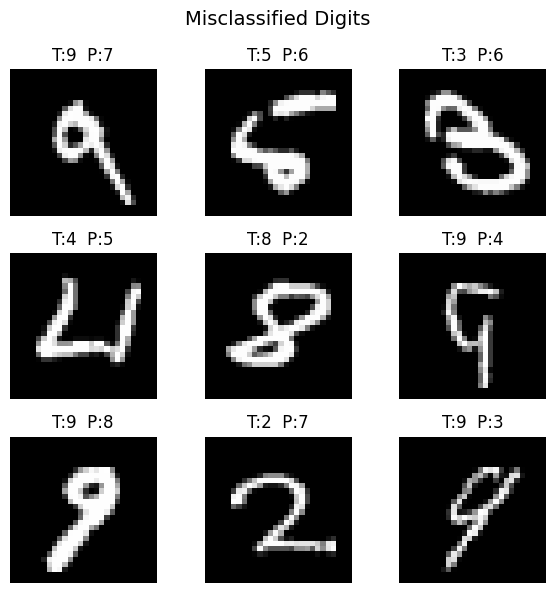

In [47]:
import matplotlib.pyplot as plt

num_images = 9  # number of images to show

plt.figure(figsize=(6,6))

for i, idx in enumerate(mis_idx[:num_images]):
    image = X_test.iloc[idx].values.reshape(28, 28)
    true_label = y_test.iloc[idx]
    pred_label = y_pred[idx]

    plt.subplot(3, 3, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"T:{true_label}  P:{pred_label}")
    plt.axis('off')

plt.suptitle("Misclassified Digits", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
results = pd.DataFrame({
    "Model": ["KNN", "SVM", "Decision Tree"],
    "Accuracy": [knn_acc, svm_acc, dt_acc]
})
#creating a dataframe to compare the accuracy of the models
print(results)


           Model  Accuracy
0            KNN    0.9722
1            SVM    0.9852
2  Decision Tree    0.8795


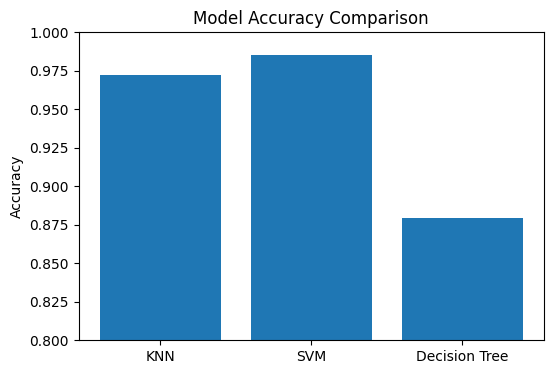

In [ ]:
import matplotlib.pyplot as plt
# plotting the accuracy of the each model
plt.figure(figsize=(6,4))
plt.bar(results["Model"], results["Accuracy"])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.8, 1.0)
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier #importing the AdaBoostClassifier and VotingClassifier from sklearn to create the AdaBoost classifier and the Voting classifier
from sklearn.metrics import accuracy_score


In [ ]:
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    n_jobs=-1 # using all the cores of the CPU
) #creating the KNN classifier
svm = SVC(
    kernel='rbf',
    C=10,
    gamma=0.05
) #creating the SVM classifier
weak_dt = DecisionTreeClassifier(
    max_depth=2,
    random_state=42
)   #creating the weak Decision Tree classifier

boosted_dt = AdaBoostClassifier(
    estimator=weak_dt,
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
) #creating the AdaBoost classifier



In [ ]:
knn.fit(X_train_pca, y_train)
svm.fit(X_train_pca, y_train)
boosted_dt.fit(X_train_pca, y_train)
#fitting the AdaBoost classifier on the train data

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=42),
                   learning_rate=0.5, n_estimators=100, random_state=42)

In [ ]:
print("KNN:", accuracy_score(y_test, knn.predict(X_test_pca)))
print("SVM:", accuracy_score(y_test, svm.predict(X_test_pca)))
print("Boosted DT:", accuracy_score(y_test, boosted_dt.predict(X_test_pca)))
#printing the accuracy score of the models

KNN: 0.9726
SVM: 0.9852
Boosted DT: 0.7974


In [ ]:
ensemble = VotingClassifier(
    estimators=[
        ('knn', knn),
        ('svm', svm),
        ('boosted_dt', boosted_dt)
    ],
    voting='hard'   # majority voting
)
#creating the Voting classifier

In [ ]:
ensemble.fit(X_train_pca, y_train)
#fitting the Voting classifier on the train data

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(n_jobs=-1,
                                                   weights='distance')),
                             ('svm', SVC(C=10, gamma=0.05)),
                             ('boosted_dt',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                                                  random_state=42),
                                                 learning_rate=0.5,
                                                 n_estimators=100,
                                                 random_state=42))])

In [ ]:
y_pred_ens = ensemble.predict(X_test_pca)
ensemble_acc = accuracy_score(y_test, y_pred_ens)
#predicting the test data
print("Ensemble Accuracy:", ensemble_acc)
#printing the accuracy score of the Voting classifier

Ensemble Accuracy: 0.9769


In [ ]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["KNN", "SVM", "Boosted DT", "Ensemble"],
    "Accuracy": [
        accuracy_score(y_test, knn.predict(X_test_pca)),
        accuracy_score(y_test, svm.predict(X_test_pca)),
        accuracy_score(y_test, boosted_dt.predict(X_test_pca)),
        ensemble_acc
    ]
})
#creating a dataframe to compare the accuracy of the models 
print(results)


        Model  Accuracy
0         KNN    0.9726
1         SVM    0.9852
2  Boosted DT    0.7974
3    Ensemble    0.9769


Short Performance Analysis

Among the three models evaluated, Support Vector Machine (SVM) performed the best in handwritten digit classification. SVM achieved the highest accuracy and F1-score due to its ability to handle high-dimensional image data and learn optimal decision boundaries with strong generalization. In contrast, K-Nearest Neighbors (KNN) showed moderate performance and was sensitive to the choice of the value of K, while Decision Tree performed reasonably well but suffered from overfitting, leading to reduced generalization on unseen data.

Analysis of misclassifications revealed that most errors occurred between visually similar digits such as 3 and 5, 4 and 9, and 8 and 9. These digits share similar stroke patterns, making them harder to distinguish, especially when handwriting styles vary or images are noisy.

To improve performance, dimensionality reduction techniques such as Principal Component Analysis (PCA) can be applied to remove noise and redundant features. Additionally, hyperparameter tuning, better preprocessing (normalization and noise reduction), and ensemble methods could further enhance classification accuracy and robustness.
